In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


<ipython-input-2-34958e059c06>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


Text(0.5, 1.0, '9')

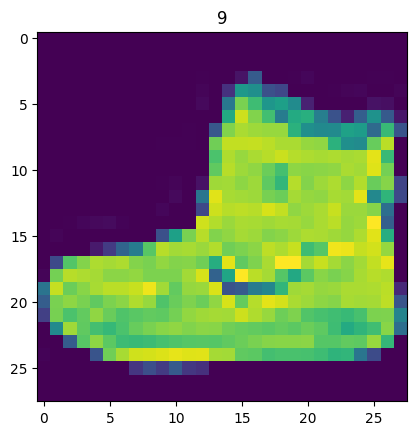

In [ ]:
plt.imshow(x_train[0])
plt.title(y_train[0])

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Define hyperparameters for hidden layers
    for i in range(hp.Int('num_layers', 2, 7)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 128, 512, 32),
                               activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))



    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    total_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])

    return model, total_trainable_params


In [ ]:
! mkdir keras_tuner_results

In [ ]:
! mkdir keras_tuner_results/fashion_mnist_tuning

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.4875 - accuracy: 0.8216 - val_loss: 0.3819 - val_accuracy: 0.8603
Epoch 2/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3714 - accuracy: 0.8619 - val_loss: 0.3859 - val_accuracy: 0.8650
Epoch 3/20
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3339 - accuracy: 0.8782 - val_loss: 0.3314 - val_accuracy: 0.8733
Epoch 4/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3110 - accuracy: 0.8849 - val_loss: 0.3545 - val_accuracy: 0.8727
Epoch 5/20
1688/1688 [==============================] - 14s 9ms/step - loss: 0.2904 - accuracy: 0.8919 - val_loss: 0.3415 - val_accuracy: 0.8713
Epoch 6/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2743 - accuracy: 0.8975 - val_loss: 0.3391 - val_accuracy: 0.8773
Epoch 7/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2645 - accuracy: 0.9018 - val_loss: 0.3318 - val_ac

In [ ]:
import matplotlib.pyplot as plt
def accuracy(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title(f"{model}  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


def loss_plot(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title(f"{model} Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


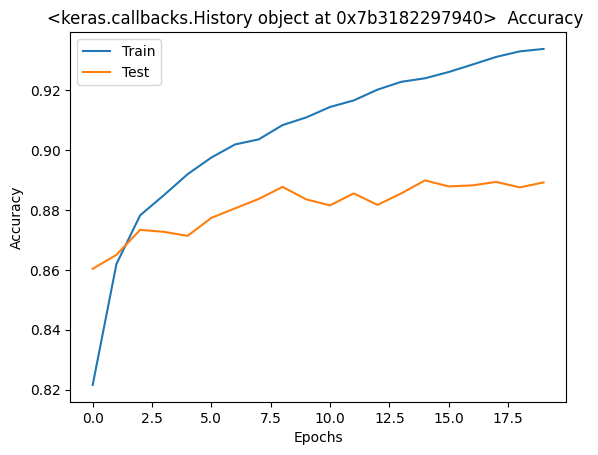

In [ ]:
accuracy(history)

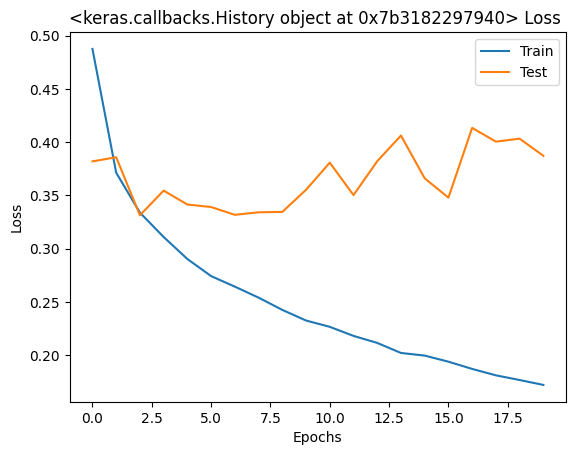

In [ ]:
loss_plot(history)

In [ ]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_results',
    project_name='fashion_mnist_tuning'
)


In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_split=0.1)


In [ ]:
# ... (previous code to perform hyperparameter search) ...

# Get the best hyperparameters and build the final model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model, total_trainable_params = tuner.hypermodel.build(best_hps)

print("Total trainable parameters:", total_trainable_params)


Total trainable parameters: 385514


In [ ]:
# Retrieve the results of the tuning process
tuner_results = tuner.results_summary()

Results summary
Results in keras_tuner_results/fashion_mnist_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 3
units_0: 288
units_1: 192
units_2: 512
units_3: 480
units_4: 288
units_5: 416
Score: 0.8859999775886536

Trial 0 summary
Hyperparameters:
num_layers: 6
units_0: 448
units_1: 288
units_2: 128
units_3: 128
units_4: 128
units_5: 128
Score: 0.8849999904632568

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 256
units_1: 224
units_2: 160
units_3: 160
units_4: 192
units_5: 192
Score: 0.8801666498184204

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 256
units_1: 160
units_2: 128
units_3: 512
units_4: 256
units_5: 352
Score: 0.878166675567627

Trial 4 summary
Hyperparameters:
num_layers: 5
units_0: 288
units_1: 128
units_2: 288
units_3: 352
units_4: 192
units_5: 352
Score: 0.8706666827201843


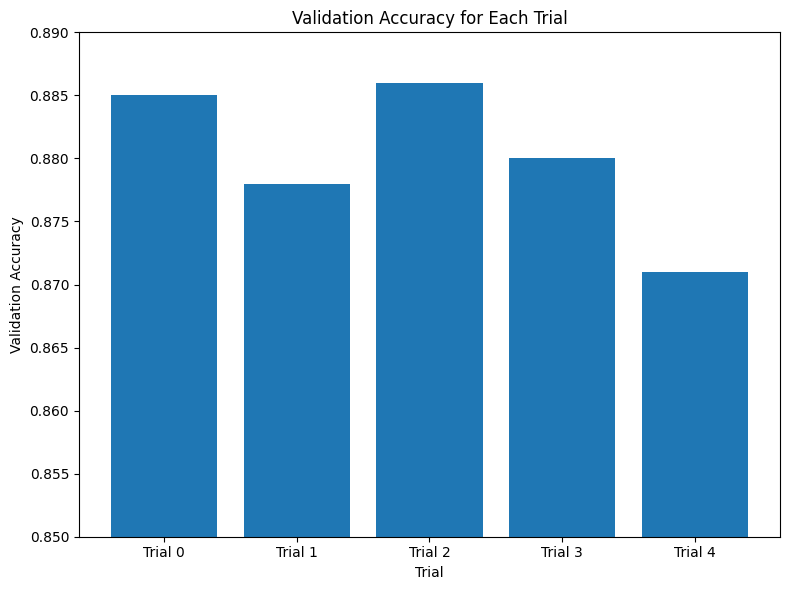

In [ ]:
import matplotlib.pyplot as plt

# Data for each trial
trial_indices = [2, 0, 3, 1, 4]
validation_accuracy = [0.886, 0.885, 0.880, 0.878, 0.871]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(trial_indices, validation_accuracy)
plt.xlabel('Trial')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Each Trial')
plt.xticks(trial_indices, ['Trial 2', 'Trial 0', 'Trial 3', 'Trial 1', 'Trial 4'])
plt.ylim(0.85, 0.89)  # Set the y-axis limits to better visualize the differences
plt.tight_layout()
plt.show()


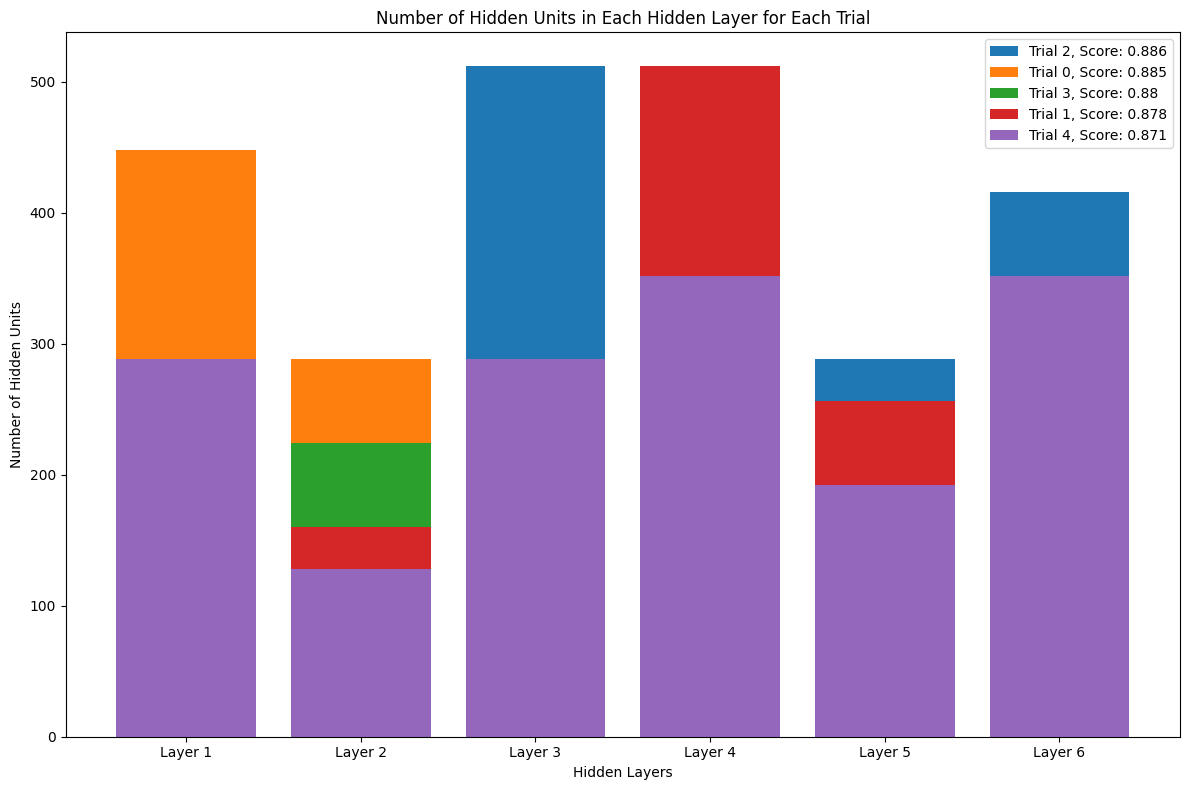

In [ ]:
import matplotlib.pyplot as plt

# Data for each trial
trial_info = {
    'Trial 2': [288, 192, 512, 480, 288, 416],
    'Trial 0': [448, 288, 128, 128, 128, 128],
    'Trial 3': [256, 224, 160, 160, 192, 192],
    'Trial 1': [256, 160, 128, 512, 256, 352],
    'Trial 4': [288, 128, 288, 352, 192, 352]
}

# Extract the validation accuracy for each trial
validation_accuracy = [0.886, 0.885, 0.880, 0.878, 0.871]

# Plot the bar graph
plt.figure(figsize=(12, 8))
for i, (trial, units) in enumerate(trial_info.items()):
    plt.bar(range(len(units)), units, label=f'{trial}, Score: {validation_accuracy[i]}')

plt.xlabel('Hidden Layers')
plt.ylabel('Number of Hidden Units')
plt.title('Number of Hidden Units in Each Hidden Layer for Each Trial')
plt.xticks(range(len(units)), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
plt.legend()
plt.tight_layout()
plt.show()
